## 3.1 Contents<a id='2.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Cleaned Loan Data](#3.4_Load_The_Cleaned_Loan_Data)
    * [3.4.1 Load Loan Data](#3.4.1_Load_Loan_Data)
    * [3.4.2 View summary statistics](#3.4.2_View_summary_statistics)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
  * [3.6 Numeric data](#3.6_Numeric_data)
    * [3.6.1 Correlation Plots](#3.6.1_Correlation_Plots)
  * [3.7 Save Processed File](#3.6_Save_Processed_File)


## 3.2 Introduction<a id='3.2_Introduction'></a>

The exploratory data analysis step for the loan prediction problem will focus on exploring the loan data, viewing summary statistics, outliers, and correlation plots.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

## 3.4 Load The Cleaned Loan Data<a id='3.4_Load_The_Cleaned_Loan_Data'></a>

### 3.4.1 Load Loan Data<a id='3.4.1_Load_Loan_Data'></a>

In [1333]:
dtype={"Credit_Score": int, 'First_Payment_Date':str, 'First_Time_Homebuyer_Flag':str,
       'Maturity_Date':str,
       'Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division':str,
       'Mortgage_Insurance_Percentage_(MI_%)':float, 'Number_of_Units':int,
       'Occupancy_Status':str, 'Original_Combined_Loan-to-Value_(CLTV)':float,
       'Original_Debt-to-Income_(DTI)_Ratio':float, 'Original_UPB':float,
       'Original_Loan-to-Value_(LTV)':float, 'Original_Interest_Rate':float, 'Channel':str,
       'Prepayment_Penalty_Mortgage_(PPM)_Flag':str, 'Property_State':str,
       'Property_Type':str, 'Postal_Code':str, 'Loan_Sequence_Number':str, 'Loan_Purpose':str,
       'Original_Loan_Term':int, 'Number_of_Borrowers':int, 'Seller_Name':str,
       'Servicer_Name':str, 'HARP_Indicator':str, 'Interest_Only_(I/O)_Indicator':str,
       'Monthly_Reporting_Period':str, 'Current_Actual_UPB':float,
       'Current_Loan_Delinquency_Status':str, 'Loan_Age':int,
       'Remaining_Months_to_Legal_Maturity':int, 'Zero_Balance_Code':str,
       'Zero_Balance_Effective_Date':str, 'Current_Interest_Rate':float,
       'Current_Deferred_UPB':float, 'Zero_Balance_Removal_UPB':float,
       'Interest_Bearing_UPB':float, 'default_status':int, 'bank_default_rate':float,
       'state_default_rate':float}

In [1334]:
!tar -xvzf ../data/processed/loan_data_cleaned.gz

x df_loan_cleaned.txt


In [1335]:
!mv df_loan_cleaned.txt ../data/processed

In [1336]:
df_loan=pd.read_csv('../data/processed/df_loan_cleaned.txt',sep="|",index_col=0,dtype=dtype)

C:\Users\rohan\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### 3.4.2 View summary statistics<a id='3.4.2_View_summary_statistics'></a>

In [1337]:
df_loan.shape

(1225000, 38)

In [1338]:
df_loan.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Occupancy_Status,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Channel,Prepayment_Penalty_Mortgage_(PPM)_Flag,Property_State,Property_Type,Postal_Code,Loan_Sequence_Number,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,HARP_Indicator,Interest_Only_(I/O)_Indicator,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Zero_Balance_Removal_UPB,Interest_Bearing_UPB,default_status
0,618,200210,N,202902,10420.0,25.00,1,P,85.00,24.00,122000.00,85.00,6.38,R,N,OH,SF,44200,F99Q10000029,N,317,2,Other sellers,Other servicers,NaN,N,200405,0.00,0,20,297,1.0,200405.0,6.38,0.00,118803.96,0.00,0
1,619,200303,N,201802,0.0,0.00,1,P,74.00,25.00,107000.00,74.00,5.25,R,N,OH,SF,44600,F99Q10000064,N,180,2,Other sellers,Other servicers,NaN,N,201307,0.00,0,125,55,1.0,201307.0,5.25,0.00,41685.65,0.00,0
2,515,200303,N,202903,12700.0,0.00,1,S,78.00,32.00,232000.00,78.00,6.25,R,N,MA,SF,2600,F99Q10000070,P,313,2,Other sellers,Other servicers,NaN,N,200504,0.00,0,26,287,1.0,200504.0,6.25,0.00,64345.87,0.00,0
3,649,199904,Y,202903,17820.0,4.87,1,P,95.00,46.00,157000.00,95.00,6.75,T,N,CO,SF,80900,F99Q10000170,P,360,1,Other sellers,GMAC MORTGAGE CORPORATION,NaN,N,200207,0.00,RA,40,320,9.0,200207.0,6.75,0.00,151980.32,0.00,1
4,768,199905,N,202904,12980.0,0.00,1,P,75.00,21.00,111000.00,75.00,6.75,R,N,MI,SF,49200,F99Q10000228,C,360,2,Other sellers,Other servicers,NaN,N,200112,0.00,0,32,328,1.0,200112.0,6.75,0.00,107139.16,0.00,0


In [1339]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225000 entries, 0 to 1224999
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count    Dtype  
---  ------                                                        --------------    -----  
 0   Credit_Score                                                  1225000 non-null  int32  
 1   First_Payment_Date                                            1225000 non-null  object 
 2   First_Time_Homebuyer_Flag                                     1225000 non-null  object 
 3   Maturity_Date                                                 1225000 non-null  object 
 4   Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division  1225000 non-null  object 
 5   Mortgage_Insurance_Percentage_(MI_%)                          1225000 non-null  float64
 6   Number_of_Units                                               1225000 non-null  int32  
 7   Occupancy_Status                             

In [1340]:
df_loan.describe()

,Credit_Score,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Original_Loan_Term,Number_of_Borrowers,Current_Actual_UPB,Loan_Age,Remaining_Months_to_Legal_Maturity,Current_Interest_Rate,Current_Deferred_UPB,Zero_Balance_Removal_UPB,Interest_Bearing_UPB,default_status
count,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,937624.00,1225000.00,1225000.00
mean,740.76,4.87,1.03,72.79,35.01,204143.15,71.65,5.14,314.09,1.56,49060.28,51.06,263.63,5.13,94.70,167157.37,48965.58,0.01
std,52.22,10.26,0.22,19.48,11.45,122612.59,18.91,1.42,77.15,0.50,113668.62,42.53,94.09,1.43,1763.84,112610.71,113489.51,0.11
min,300.00,0.00,1.00,2.00,1.00,7000.00,2.00,1.75,36.00,1.00,0.00,0.00,-49.00,1.75,0.00,0.00,0.00,0.00
25%,707.00,0.00,1.00,62.00,27.00,113000.00,61.00,4.00,240.00,1.00,0.00,19.00,193.00,4.00,0.00,86071.49,0.00,0.00
50%,751.00,0.00,1.00,77.00,36.00,175000.00,75.00,4.99,360.00,2.00,0.00,37.00,304.00,4.88,0.00,144545.99,0.00,0.00
75%,783.00,0.00,1.00,84.00,44.00,268000.00,80.00,6.25,360.00,2.00,0.00,73.00,336.00,6.12,0.00,228150.54,0.00,0.00
max,850.00,55.00,4.00,630.00,70.00,1582000.00,534.00,13.75,480.00,5.00,1506764.78,295.00,480.00,13.75,217706.14,1143156.27,1506764.78,1.00


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

Check distribution of default status and data imbalance.

In [1341]:
df_loan['default_status'].value_counts(normalize=True)

0   0.99
1   0.01
Name: default_status, dtype: float64

In [1342]:
df_loan['default_status'].value_counts()

0    1208751
1      16249
Name: default_status, dtype: int64

In [1343]:
df_loan['Property_State'].value_counts().head()

CA    146450
TX     75269
FL     74170
IL     63013
OH     47306
Name: Property_State, dtype: int64

The highest number of loans are taken from homeowners in California, where the default rate is in the low to medium spectrum, followed by Texas with 75269 loans (per data exploration in data wrangling).

In [1344]:
df_loan['Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division'].value_counts().head()

0.0        270991
31084.0     26253
38060.0     22330
12060.0     21717
47894.0     19868
Name: Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division, dtype: int64

The highest number of loans from metropolitan areas are from Glendale in Los Angeles followed by Arizona. This seems consistent with California being at the top for loans (per data exploration in data wrangling).

In [1345]:
df_loan['Postal_Code'].value_counts().head()

94500    12149
75000    11545
30000    11420
60000    10888
85200    10329
Name: Postal_Code, dtype: int64

The zipcode referring to Oakland, California has the highest number of loans followed by Texas which again follows the trend in the data.

Continuing below to gather default rate aggregate stats by servicer name/bank.

In [1346]:
def no_defaults(x):
    return (x==0).sum()

In [1347]:
servicer_name_default_df=df_loan.groupby('Servicer_Name')['default_status'].agg(['sum',no_defaults,'count']).rename(columns={'sum':'defaults'})
servicer_name_default_df['bank_default_rate']=((servicer_name_default_df['defaults']*1.0)/servicer_name_default_df['count'])
servicer_name_default_df.head()
servicer_name_default_rate_df=servicer_name_default_df[['bank_default_rate']]

In [1348]:
servicer_name_default_rate_plot_df=servicer_name_default_rate_df[servicer_name_default_rate_df['bank_default_rate']!=0]

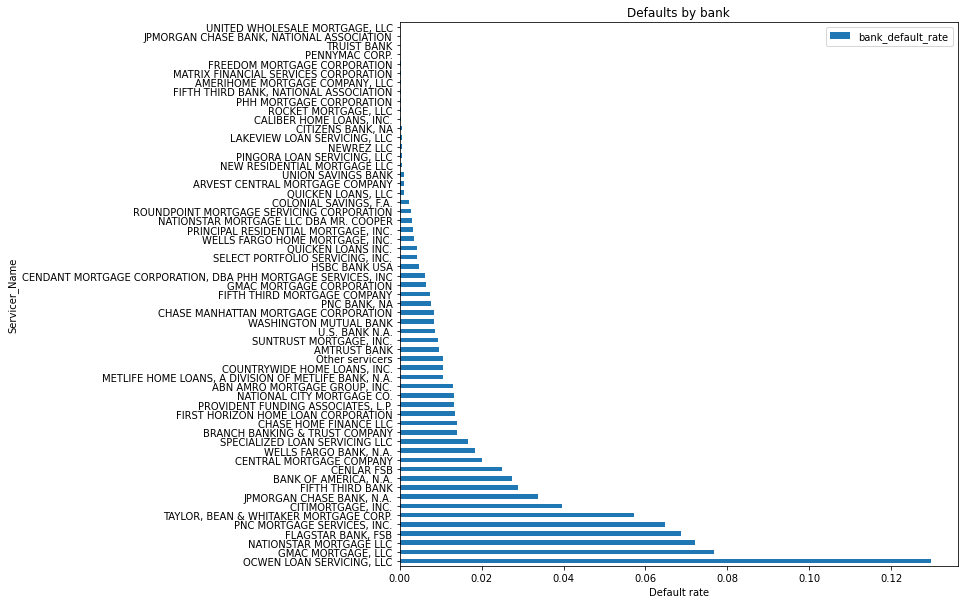

In [1349]:
(servicer_name_default_rate_plot_df.reindex(index=servicer_name_default_rate_plot_df['bank_default_rate']
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Defaults by bank'))
plt.xlabel('Default rate');

The maximum default rate appears to be above 0.12 for Owcen loan servicing. The other servicers are below 0.08. It may be good to include the servicer default rate statistics  as a feature to inform the model.

In [1350]:
df_loan = df_loan.merge(servicer_name_default_rate_df, how='left', right_index=True,left_on='Servicer_Name')
df_loan.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Occupancy_Status,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Channel,Prepayment_Penalty_Mortgage_(PPM)_Flag,Property_State,Property_Type,Postal_Code,Loan_Sequence_Number,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,HARP_Indicator,Interest_Only_(I/O)_Indicator,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Zero_Balance_Removal_UPB,Interest_Bearing_UPB,default_status,bank_default_rate
0,618,200210,N,202902,10420.0,25.00,1,P,85.00,24.00,122000.00,85.00,6.38,R,N,OH,SF,44200,F99Q10000029,N,317,2,Other sellers,Other servicers,NaN,N,200405,0.00,0,20,297,1.0,200405.0,6.38,0.00,118803.96,0.00,0,0.01
1,619,200303,N,201802,0.0,0.00,1,P,74.00,25.00,107000.00,74.00,5.25,R,N,OH,SF,44600,F99Q10000064,N,180,2,Other sellers,Other servicers,NaN,N,201307,0.00,0,125,55,1.0,201307.0,5.25,0.00,41685.65,0.00,0,0.01
2,515,200303,N,202903,12700.0,0.00,1,S,78.00,32.00,232000.00,78.00,6.25,R,N,MA,SF,2600,F99Q10000070,P,313,2,Other sellers,Other servicers,NaN,N,200504,0.00,0,26,287,1.0,200504.0,6.25,0.00,64345.87,0.00,0,0.01
3,649,199904,Y,202903,17820.0,4.87,1,P,95.00,46.00,157000.00,95.00,6.75,T,N,CO,SF,80900,F99Q10000170,P,360,1,Other sellers,GMAC MORTGAGE CORPORATION,NaN,N,200207,0.00,RA,40,320,9.0,200207.0,6.75,0.00,151980.32,0.00,1,0.01
4,768,199905,N,202904,12980.0,0.00,1,P,75.00,21.00,111000.00,75.00,6.75,R,N,MI,SF,49200,F99Q10000228,C,360,2,Other sellers,Other servicers,NaN,N,200112,0.00,0,32,328,1.0,200112.0,6.75,0.00,107139.16,0.00,0,0.01


Exploring default rate aggregate stats by state.

In [1351]:
state_default_df=df_loan.groupby('Property_State')['default_status'].agg(['sum',no_defaults,'count']).rename(columns={'sum':'defaults'})
state_default_df['state_default_rate']=((state_default_df['defaults']*1.0)/state_default_df['count'])
state_default_df.head()
state_default_rate_df=state_default_df[['state_default_rate']]

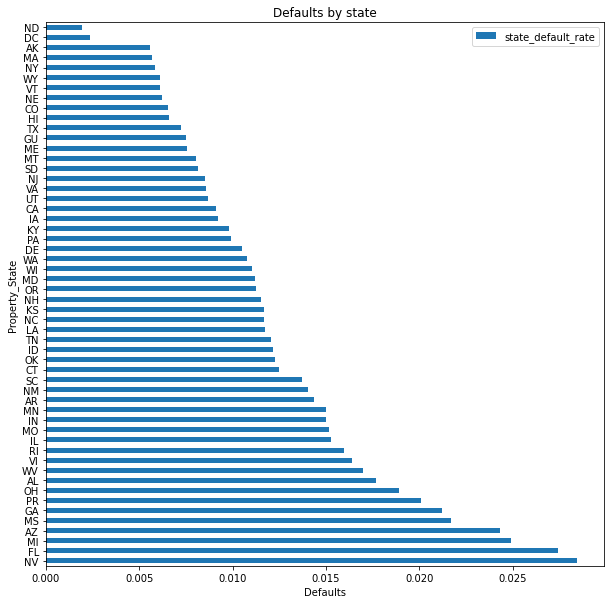

In [1352]:
(state_default_rate_df.reindex(index=state_default_rate_df['state_default_rate']
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Defaults by state'))
plt.xlabel('Defaults');

The maximum default rate appears to be above 0.025 for Nevada. The other states are below this rate with California in the low area of the spectrum with under 0.010 default rate (even though we previously observed that California has the maximum loans). It may be good to include this feature as well to inform the model.

In [1353]:
df_loan = df_loan.merge(state_default_rate_df, how='left', right_index=True,left_on='Property_State')
df_loan.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Occupancy_Status,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Channel,Prepayment_Penalty_Mortgage_(PPM)_Flag,Property_State,Property_Type,Postal_Code,Loan_Sequence_Number,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,HARP_Indicator,Interest_Only_(I/O)_Indicator,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Zero_Balance_Removal_UPB,Interest_Bearing_UPB,default_status,bank_default_rate,state_default_rate
0,618,200210,N,202902,10420.0,25.00,1,P,85.00,24.00,122000.00,85.00,6.38,R,N,OH,SF,44200,F99Q10000029,N,317,2,Other sellers,Other servicers,NaN,N,200405,0.00,0,20,297,1.0,200405.0,6.38,0.00,118803.96,0.00,0,0.01,0.02
1,619,200303,N,201802,0.0,0.00,1,P,74.00,25.00,107000.00,74.00,5.25,R,N,OH,SF,44600,F99Q10000064,N,180,2,Other sellers,Other servicers,NaN,N,201307,0.00,0,125,55,1.0,201307.0,5.25,0.00,41685.65,0.00,0,0.01,0.02
2,515,200303,N,202903,12700.0,0.00,1,S,78.00,32.00,232000.00,78.00,6.25,R,N,MA,SF,2600,F99Q10000070,P,313,2,Other sellers,Other servicers,NaN,N,200504,0.00,0,26,287,1.0,200504.0,6.25,0.00,64345.87,0.00,0,0.01,0.01
3,649,199904,Y,202903,17820.0,4.87,1,P,95.00,46.00,157000.00,95.00,6.75,T,N,CO,SF,80900,F99Q10000170,P,360,1,Other sellers,GMAC MORTGAGE CORPORATION,NaN,N,200207,0.00,RA,40,320,9.0,200207.0,6.75,0.00,151980.32,0.00,1,0.01,0.01
4,768,199905,N,202904,12980.0,0.00,1,P,75.00,21.00,111000.00,75.00,6.75,R,N,MI,SF,49200,F99Q10000228,C,360,2,Other sellers,Other servicers,NaN,N,200112,0.00,0,32,328,1.0,200112.0,6.75,0.00,107139.16,0.00,0,0.01,0.02


In [1354]:
df_loan.isna().sum()

Credit_Score                                                          0
First_Payment_Date                                                    0
First_Time_Homebuyer_Flag                                             0
Maturity_Date                                                         0
Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division          0
Mortgage_Insurance_Percentage_(MI_%)                                  0
Number_of_Units                                                       0
Occupancy_Status                                                      0
Original_Combined_Loan-to-Value_(CLTV)                                0
Original_Debt-to-Income_(DTI)_Ratio                                   0
Original_UPB                                                          0
Original_Loan-to-Value_(LTV)                                          0
Original_Interest_Rate                                                0
Channel                                                         

The information provided by the columns with high null values have already been considered. The zero balance code related columns have been used to compute default status and hence can be dropped. The HARP indicator column was used to compute the Original Debt to income ratio and hence can be dropped as well. 

TBD Will drop these columns in the modeling pipeline.

In [1355]:
df_loan['Prepayment_Penalty_Mortgage_(PPM)_Flag'].value_counts()

N    1223553
Y       1447
Name: Prepayment_Penalty_Mortgage_(PPM)_Flag, dtype: int64

In [1356]:
df_loan['Occupancy_Status'].value_counts()

P    1102100
I      74715
S      48185
Name: Occupancy_Status, dtype: int64

In [1357]:
df_loan['Loan_Purpose'].value_counts()

P    500612
N    422557
C    301831
Name: Loan_Purpose, dtype: int64

In [1358]:
df_loan['Property_Type'].value_counts()

SF    883595
PU    242521
CO     89285
MH      7038
CP      2561
Name: Property_Type, dtype: int64

## 3.6 Numeric data<a id='3.6_Numeric_data'></a>

In [1359]:
df_loan_mod=df_loan._get_numeric_data()

{'whiskers': [<matplotlib.lines.Line2D at 0x19070e48a90>,
 'caps': [<matplotlib.lines.Line2D at 0x19070e58048>,
 'boxes': [<matplotlib.lines.Line2D at 0x19070e48828>],
 'medians': [<matplotlib.lines.Line2D at 0x19070e585f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19070e588d0>],
 'means': []}

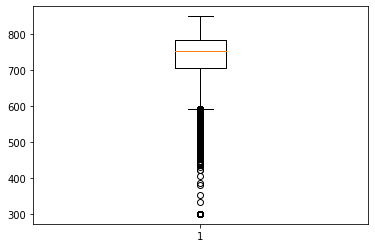

In [1360]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Credit_Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19070ea7f28>,
 'caps': [<matplotlib.lines.Line2D at 0x19070eb74e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19070ea7cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x19070eb7a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x19070eb7d68>],
 'means': []}

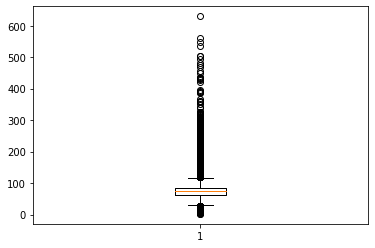

In [1361]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Original_Combined_Loan-to-Value_(CLTV)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19070f13828>,
 'caps': [<matplotlib.lines.Line2D at 0x19070f13da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19070f135c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19070f23390>],
 'fliers': [<matplotlib.lines.Line2D at 0x19070f23668>],
 'means': []}

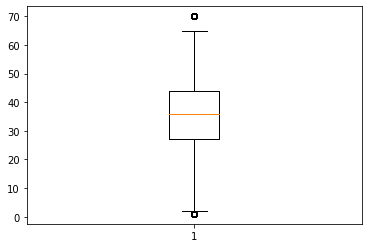

In [1362]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Original_Debt-to-Income_(DTI)_Ratio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19070f7d630>,
 'caps': [<matplotlib.lines.Line2D at 0x19070f7dba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19070f7d3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x19070f8b198>],
 'fliers': [<matplotlib.lines.Line2D at 0x19070f8b470>],
 'means': []}

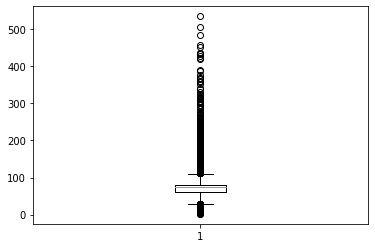

In [1363]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Original_Loan-to-Value_(LTV)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19070fdc978>,
 'caps': [<matplotlib.lines.Line2D at 0x19070fdcef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19070fdc710>],
 'medians': [<matplotlib.lines.Line2D at 0x19070fee4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19070fee7b8>],
 'means': []}

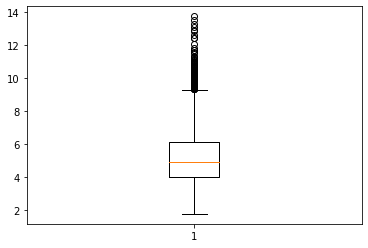

In [1364]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Original_Interest_Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1907104c160>,
 'caps': [<matplotlib.lines.Line2D at 0x1907104c6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1907103ceb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1907104cc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1907104cf60>],
 'means': []}

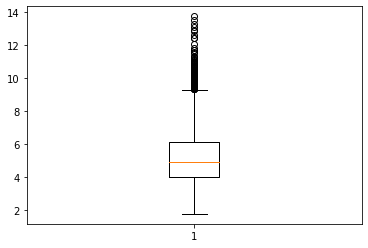

In [1365]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Current_Interest_Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x190710aa8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x190710aae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x190710aa668>],
 'medians': [<matplotlib.lines.Line2D at 0x190710b9438>],
 'fliers': [<matplotlib.lines.Line2D at 0x190710b9710>],
 'means': []}

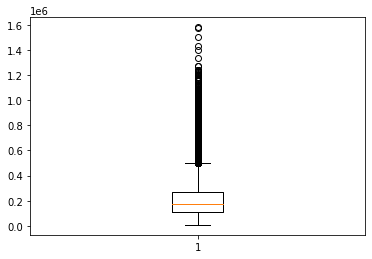

In [1366]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['Original_UPB'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19071111ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x19071120160>,
 'boxes': [<matplotlib.lines.Line2D at 0x19071111940>],
 'medians': [<matplotlib.lines.Line2D at 0x19071120710>],
 'fliers': [<matplotlib.lines.Line2D at 0x190711209e8>],
 'means': []}

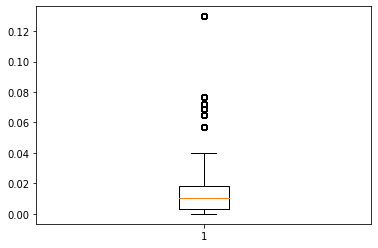

In [1367]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['bank_default_rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1907117e470>,
 'caps': [<matplotlib.lines.Line2D at 0x1907117e9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1907117e208>],
 'medians': [<matplotlib.lines.Line2D at 0x1907117ef98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1907118e2b0>],
 'means': []}

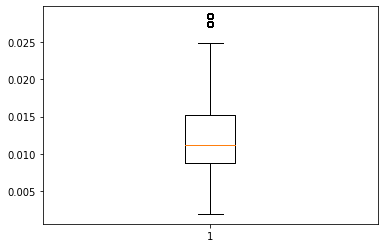

In [1368]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==0]['state_default_rate'])

Default column.

{'whiskers': [<matplotlib.lines.Line2D at 0x190715f0358>,
 'caps': [<matplotlib.lines.Line2D at 0x190715f08d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x190715f00f0>],
 'medians': [<matplotlib.lines.Line2D at 0x190715f0e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x190715fe198>],
 'means': []}

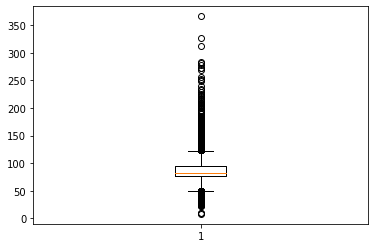

In [1369]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==1]['Original_Combined_Loan-to-Value_(CLTV)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1907165b0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1907165b630>,
 'boxes': [<matplotlib.lines.Line2D at 0x19071649e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1907165bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1907165beb8>],
 'means': []}

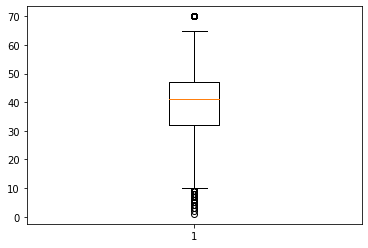

In [1370]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==1]['Original_Debt-to-Income_(DTI)_Ratio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x190716b6dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x190716c7390>,
 'boxes': [<matplotlib.lines.Line2D at 0x190716b6b70>],
 'medians': [<matplotlib.lines.Line2D at 0x190716c7940>],
 'fliers': [<matplotlib.lines.Line2D at 0x190716c7c18>],
 'means': []}

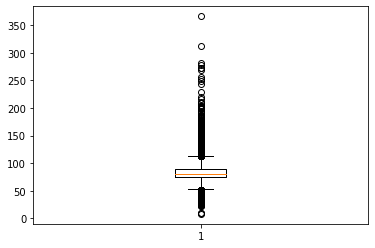

In [1371]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==1]['Original_Loan-to-Value_(LTV)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19071720b00>,
 'caps': [<matplotlib.lines.Line2D at 0x190717300b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19071720898>],
 'medians': [<matplotlib.lines.Line2D at 0x19071730668>],
 'fliers': [<matplotlib.lines.Line2D at 0x19071730940>],
 'means': []}

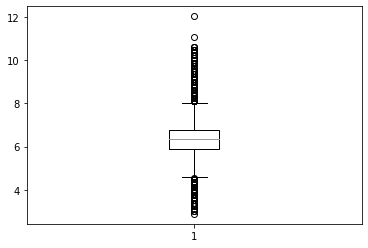

In [1372]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==1]['Original_Interest_Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19071783940>,
 'caps': [<matplotlib.lines.Line2D at 0x19071783eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x190717836d8>],
 'medians': [<matplotlib.lines.Line2D at 0x190717924a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19071792780>],
 'means': []}

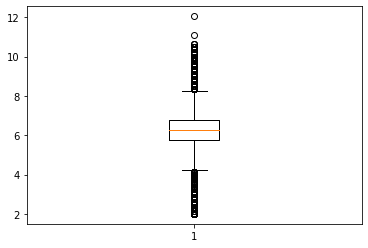

In [1373]:
plt.boxplot(df_loan_mod[df_loan_mod['default_status']==1]['Current_Interest_Rate'])

The above boxplots all have outliers. These will be looked into further during model preprocessing.

### 3.6.1 Correlation Plots<a id='3.6.1_Correlation_Plots'></a>

<AxesSubplot:>

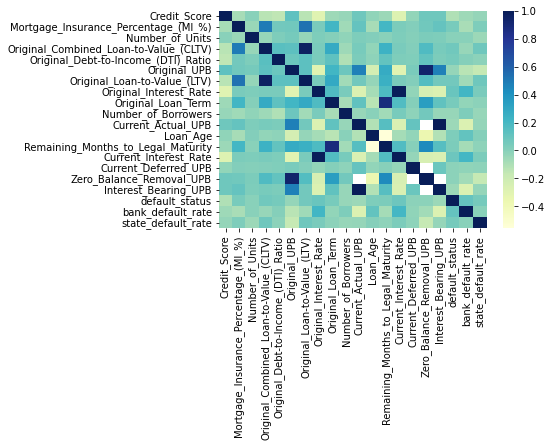

In [1374]:
sns.heatmap(df_loan_mod.corr(),cmap="YlGnBu")

There is some high cross correlation between variables like Original UPB, Interest Bearing UPB, Zero Balance Removal, and Current Actual UPB. We also have high cross correlation between CLTV, LTV, and Mortgage Insurance percentage. The exclusion of highly correlated variables will be looked into further during model preprocessing. 

## 3.6 Save Processed File<a id='3.6_Save_Processed_File'></a>

In [1375]:
df_loan_mod.to_csv('../data/processed/df_loan_preprocessed.txt',sep="|")